**Purpose: To understand the influence of the parents background, test preparation etc on students' academic performances.**

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#in case your forget to output the visualizations
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

**Read data from the dataset**

In [2]:
data = pd.read_csv("StudentsPerformance.csv")

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
data.describe().T
# .T is transcribe the table (make it swap between columns and rows)

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


**To check if there are any missing values in the dataset or not**

In [6]:
data.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [7]:
!pip install missingo

ERROR: Could not find a version that satisfies the requirement missingo (from versions: none)
ERROR: No matching distribution found for missingo


In [8]:
import missingno as msno

<Axes: >

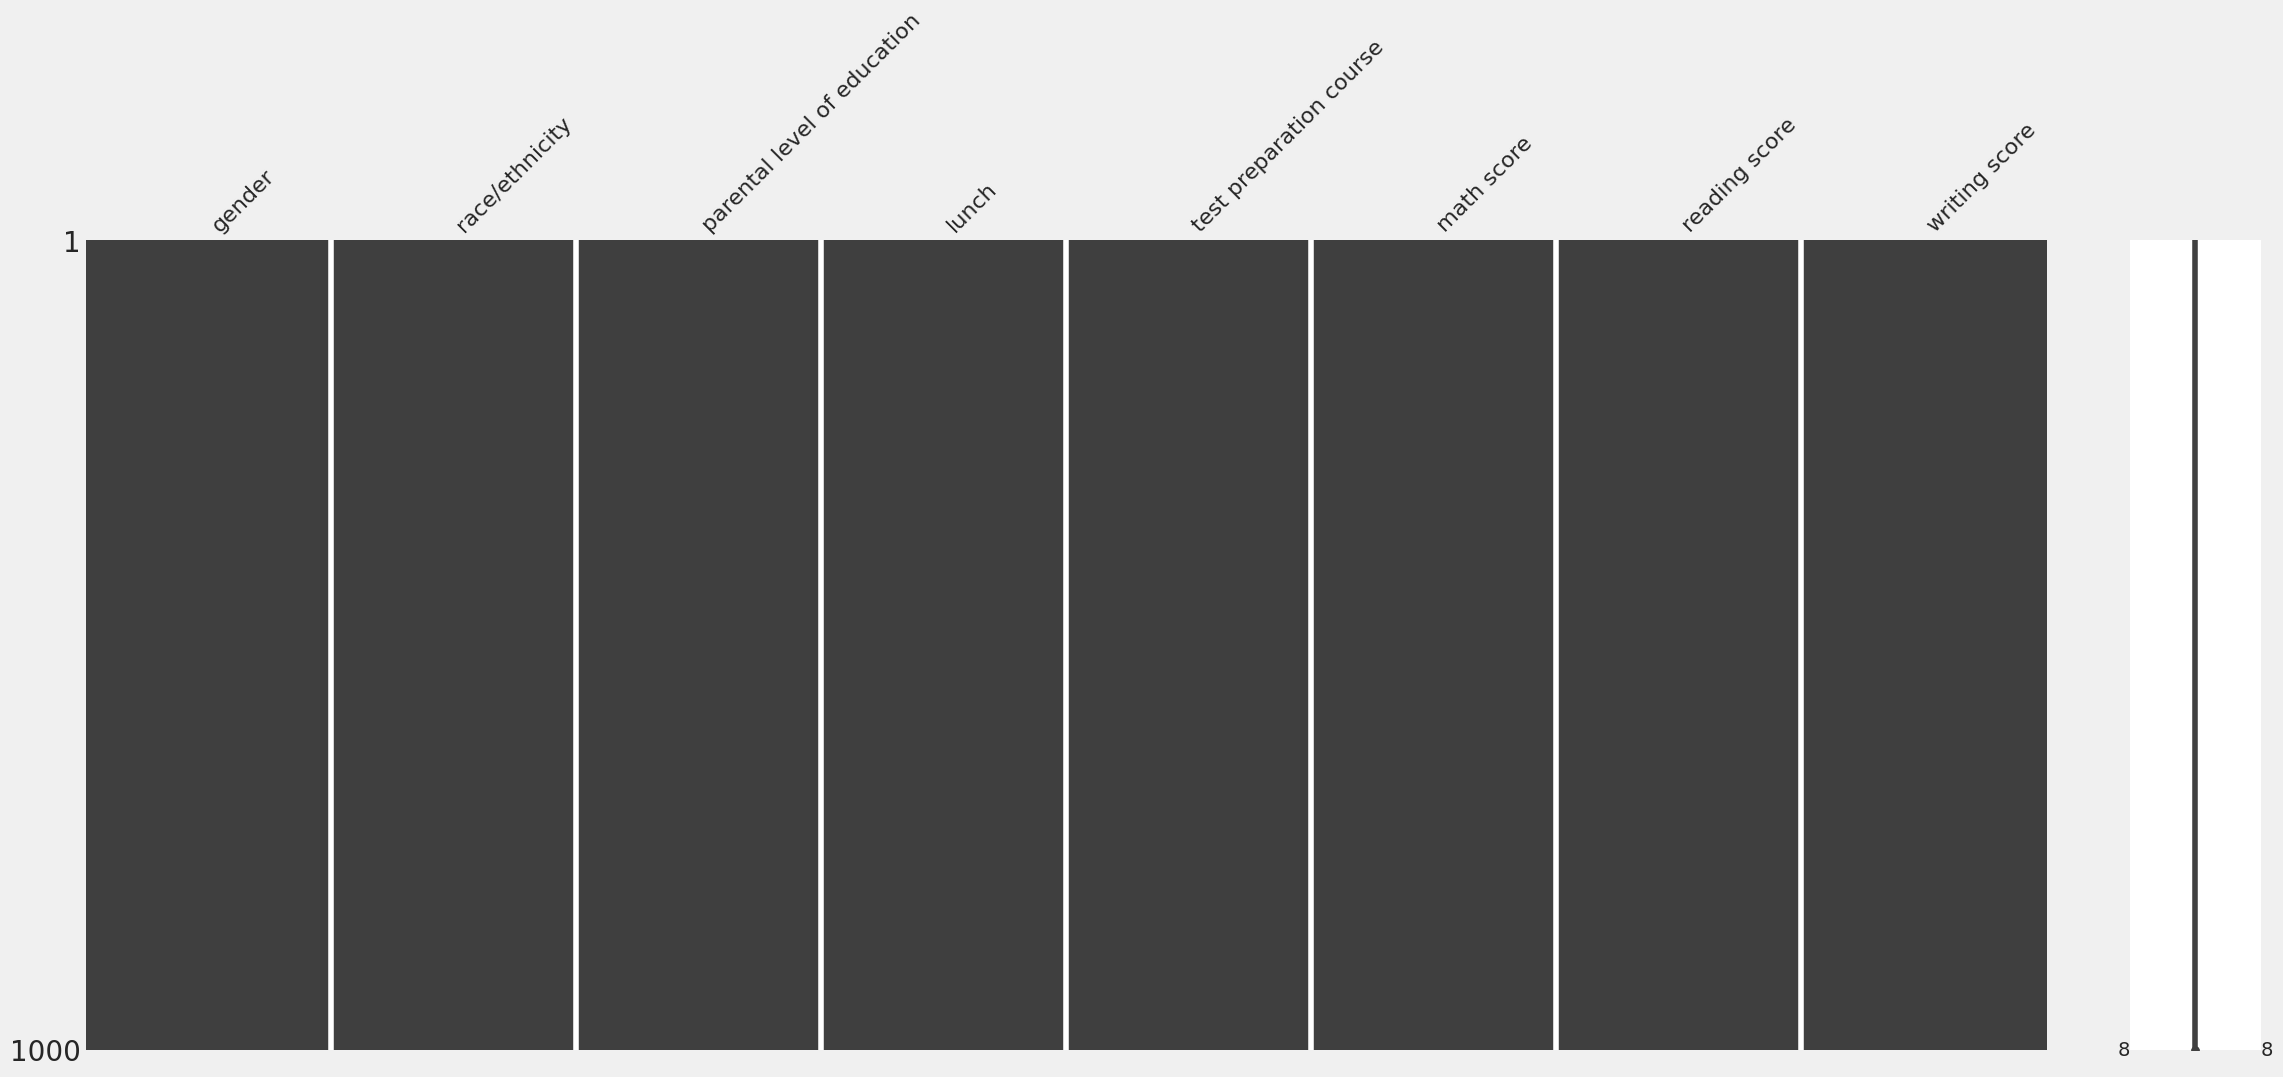

In [9]:
msno.matrix(data)

All columns have no NULL values

### **Part 1: Data Visualization (compare each column)**

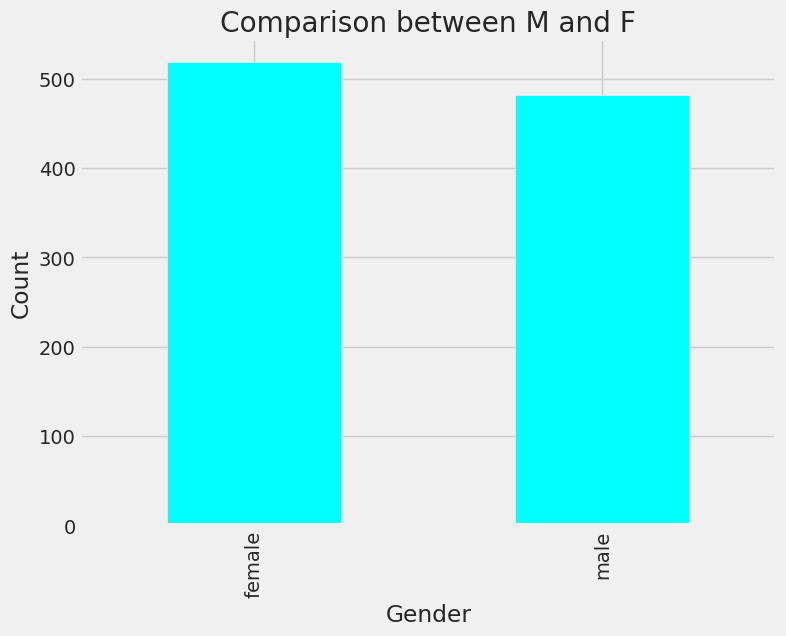

In [10]:
# gender column

plt.subplots(figsize=(8, 6))

data['gender'].value_counts(normalize=True)
data['gender'].value_counts(dropna=True).plot.bar(color='cyan')
plt.title('Comparison between M and F')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

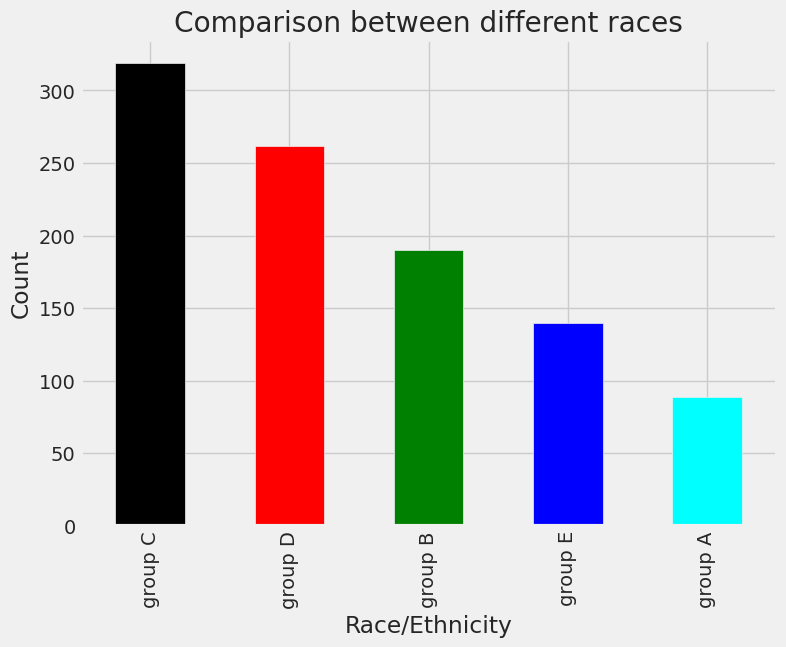

In [11]:
# race/ethnicity column

plt.subplots(figsize=(8, 6))

data['race/ethnicity'].value_counts(normalize=True)
data['race/ethnicity'].value_counts(dropna=True).plot.bar(color=['black', 'red', 'green', 'blue', 'cyan'])
plt.title('Comparison between different races')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Count')
plt.show()

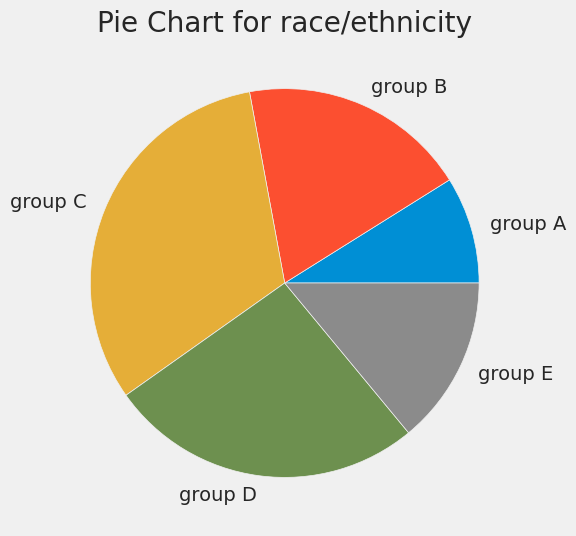

In [12]:
# pie chart for race/ethnicity

df = data.groupby('race/ethnicity').size()

df.plot(kind='pie', subplots=True, figsize=(10,6))
plt.title('Pie Chart for race/ethnicity')
plt.ylabel("")
plt.show()

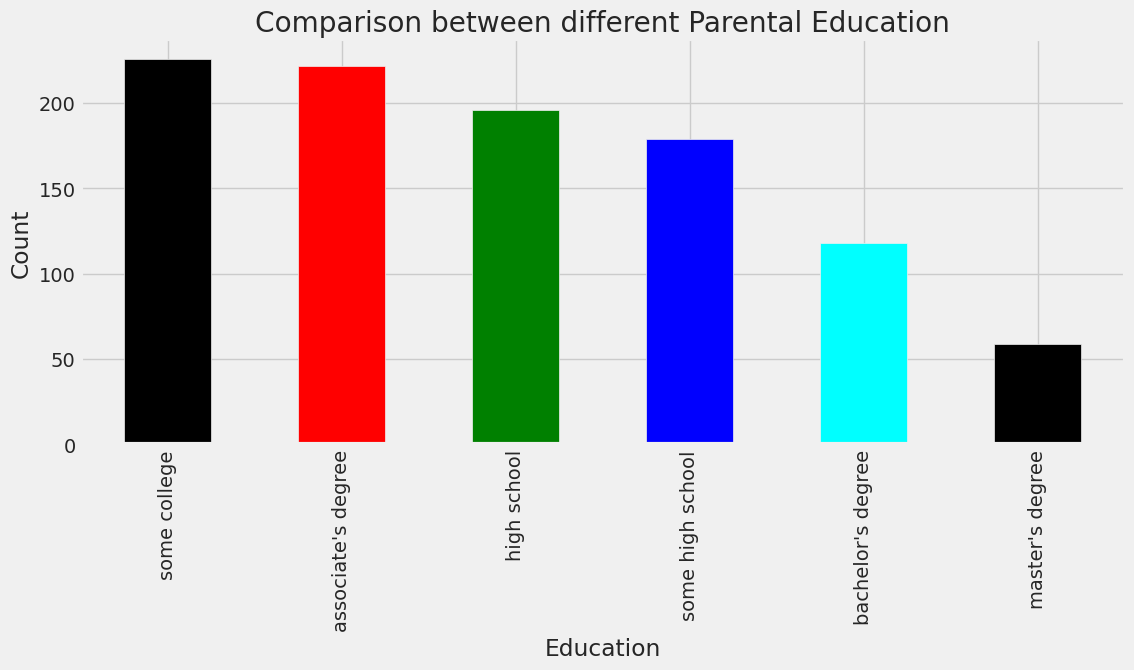

In [13]:
# compare parents education level

plt.subplots(figsize=(12,5))
data['parental level of education'].value_counts(normalize=True)
data['parental level of education'].value_counts(dropna=True).plot.bar(color=['black', 'red', 'green', 'blue', 'cyan'])
plt.title('Comparison between different Parental Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

In [14]:
# to check the accuracy of the chart

data['parental level of education'].value_counts()

,count
parental level of education,
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


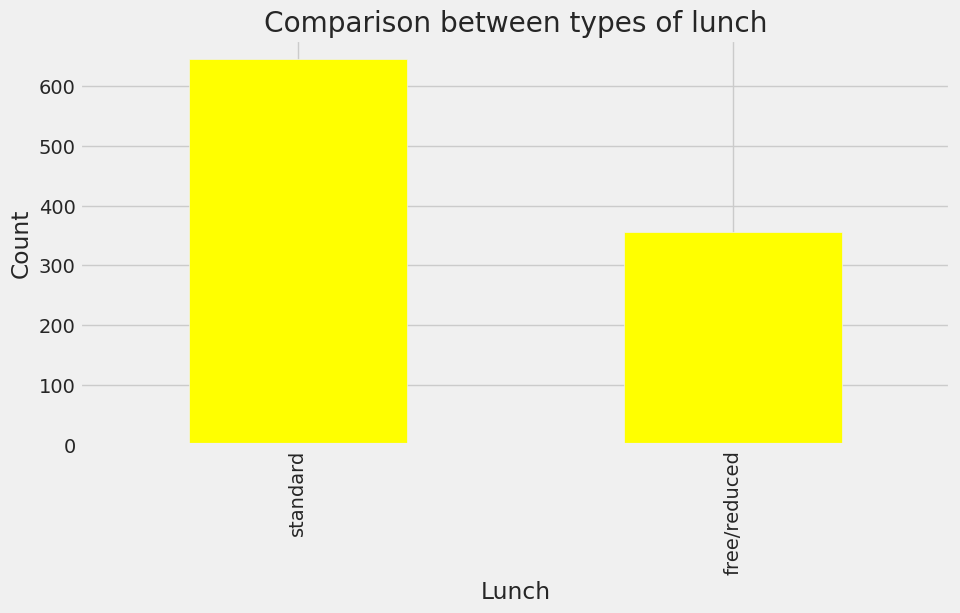

In [15]:
# lunch column

plt.subplots(figsize=(10,5))
data['lunch'].value_counts(normalize=True)
data['lunch'].value_counts(dropna=False).plot.bar(color='yellow')
plt.title('Comparison between types of lunch')
plt.xlabel('Lunch')
plt.ylabel('Count')
plt.show()

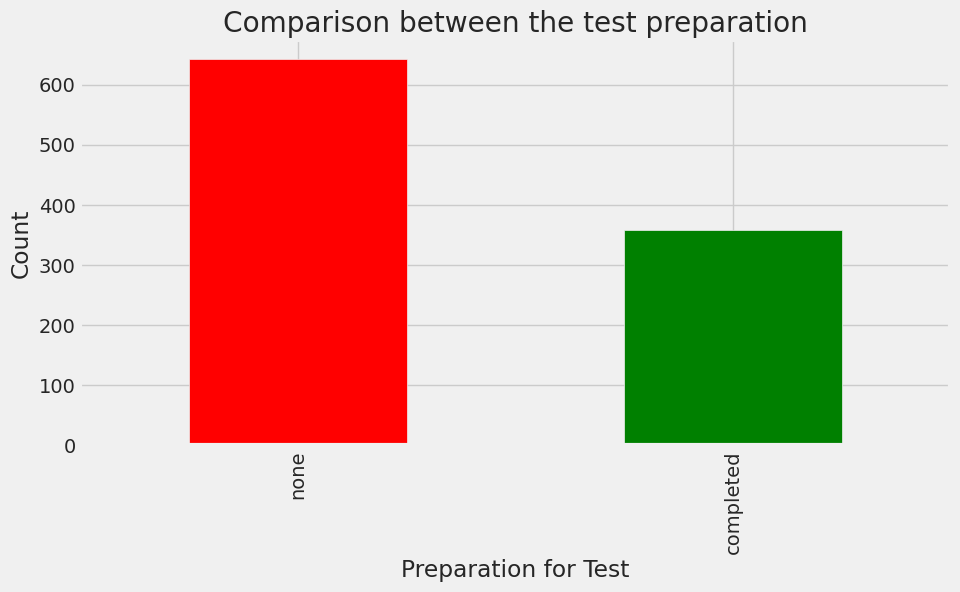

In [16]:
# test prepatation column

plt.subplots(figsize=(10,5))
data['test preparation course'].value_counts(normalize=True)
data['test preparation course'].value_counts(dropna=False).plot.bar(color=['red', 'green'])
plt.title('Comparison between the test preparation')
plt.xlabel('Preparation for Test')
plt.ylabel('Count')
plt.show()

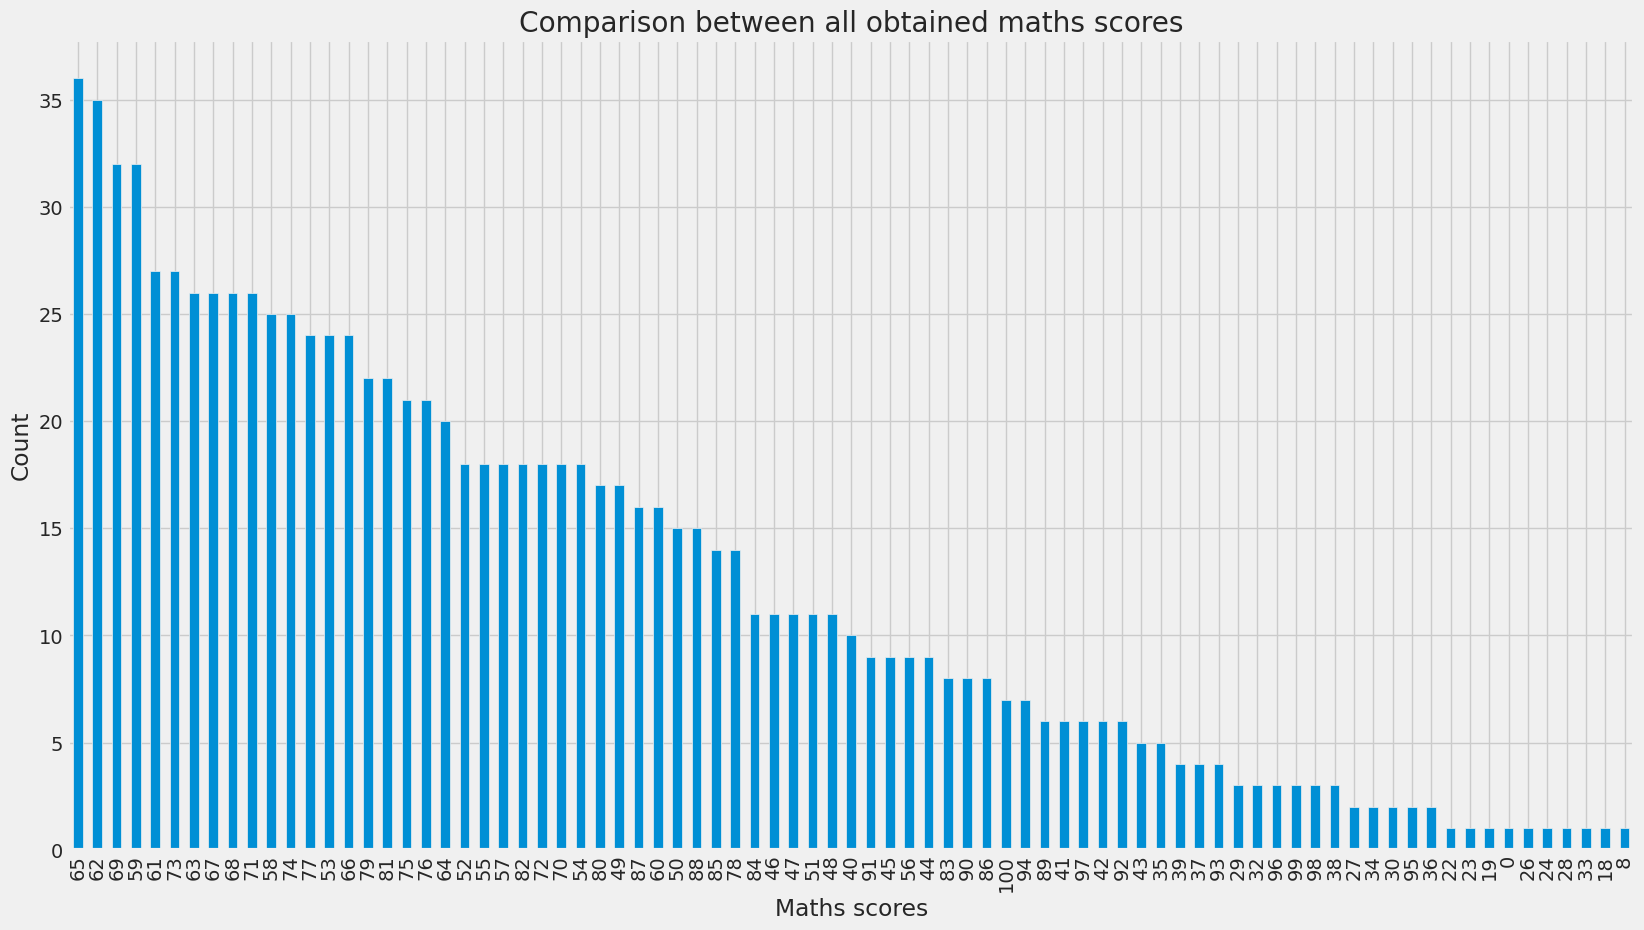

In [17]:
# maths score column

plt.subplots(figsize=(10,5))
data['math score'].value_counts(normalize=True)
data['math score'].value_counts(dropna=False).plot.bar(figsize=(18,10))
plt.title('Comparison between all obtained maths scores')
plt.xlabel('Maths scores')
plt.ylabel('Count')
plt.show()

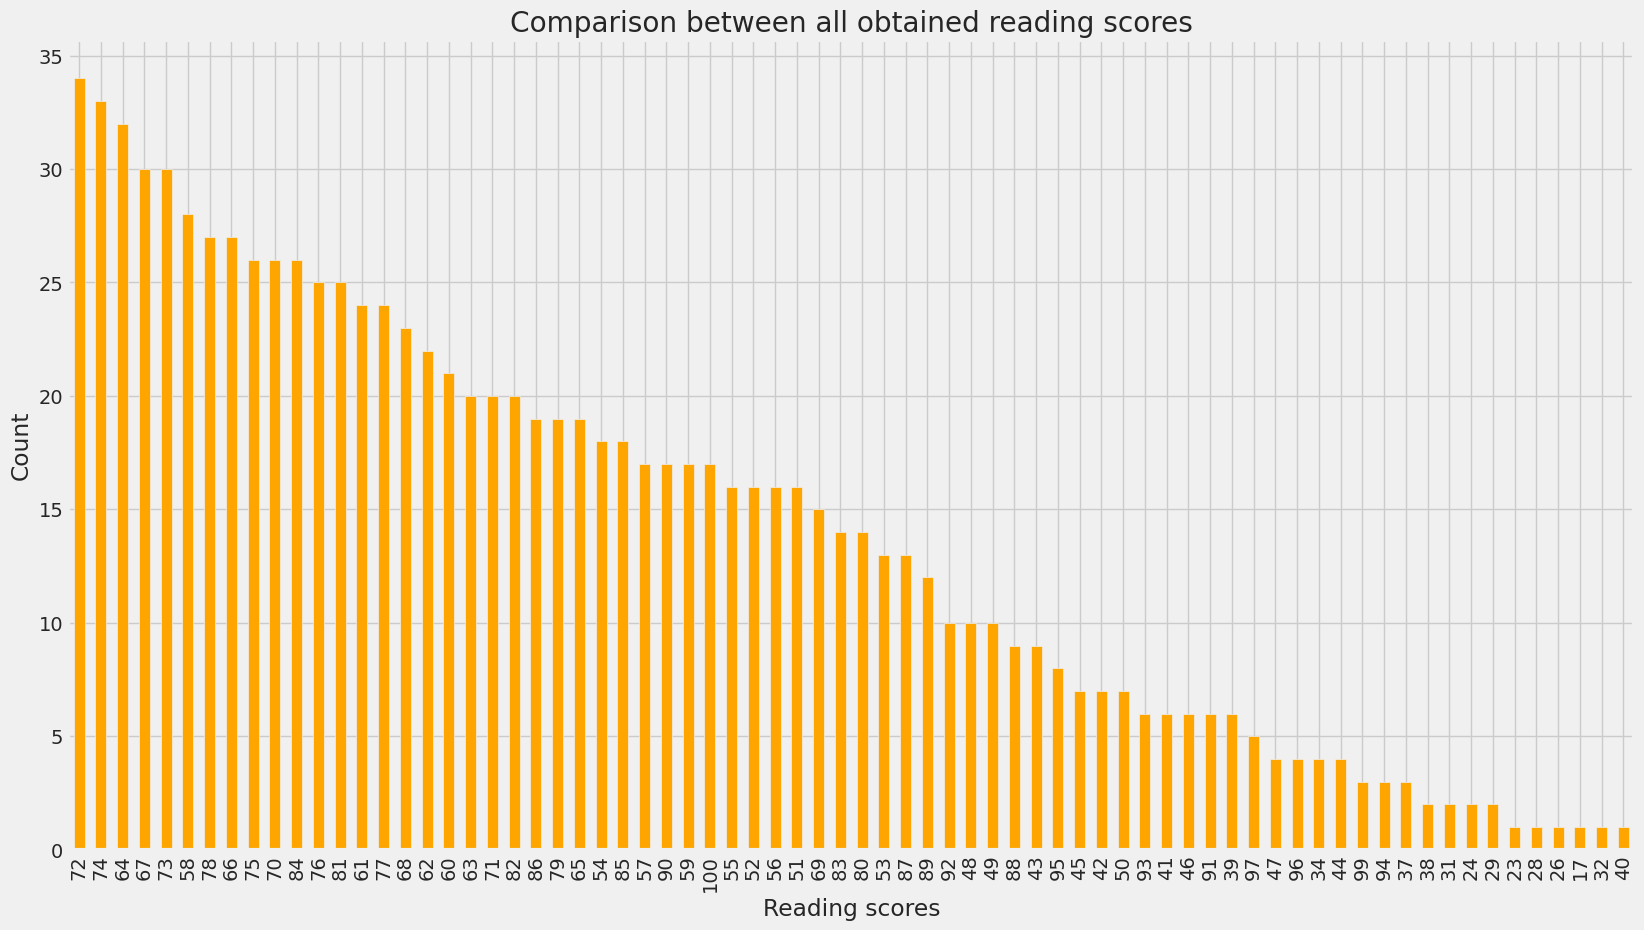

In [18]:
# reading score column

plt.subplots(figsize=(10,5))
data['reading score'].value_counts(normalize=True)
data['reading score'].value_counts(dropna=False).plot.bar(figsize=(18,10), color='orange')
plt.title('Comparison between all obtained reading scores')
plt.xlabel('Reading scores')
plt.ylabel('Count')
plt.show()

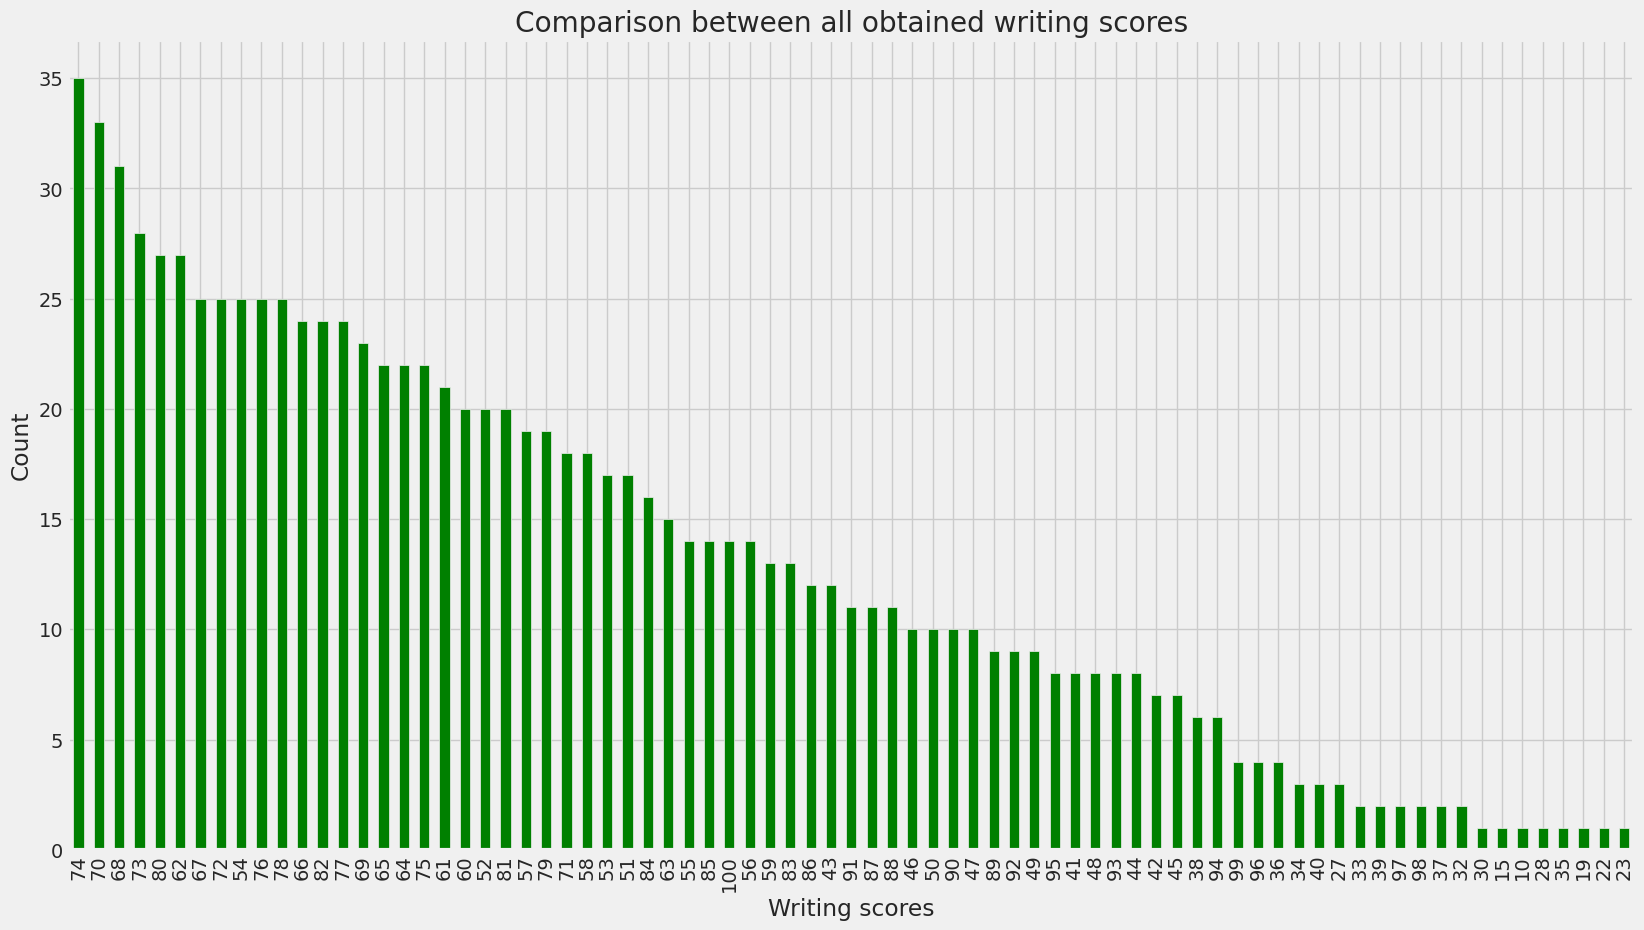

In [19]:
# writing score column

plt.subplots(figsize=(10,5))
data['writing score'].value_counts(normalize=True)
data['writing score'].value_counts(dropna=False).plot.bar(figsize=(18,10), color='green')
plt.title('Comparison between all obtained writing scores')
plt.xlabel('Writing scores')
plt.ylabel('Count')
plt.show()

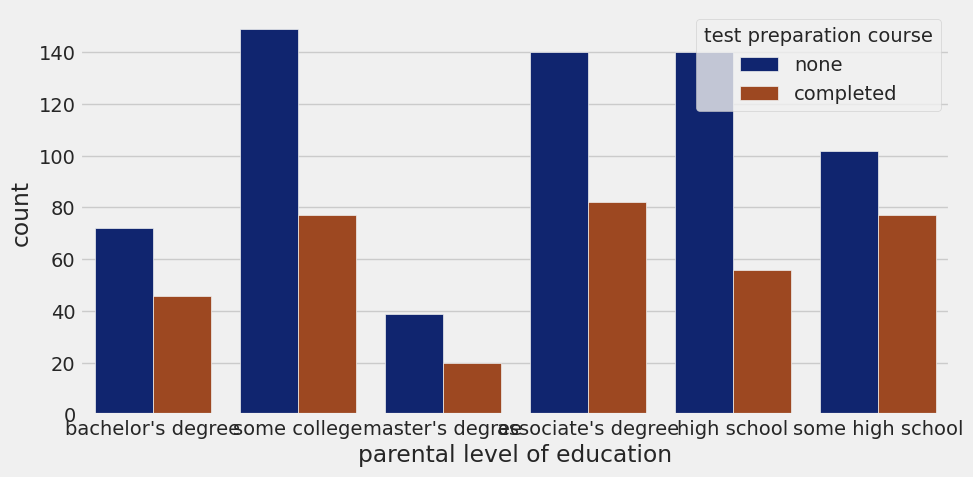

In [25]:
# parental lvl of education & test preparation

plt.subplots(figsize=(10,5))
sns.countplot(x='parental level of education', data = data, hue = 'test preparation course', palette = 'dark')
plt.show()

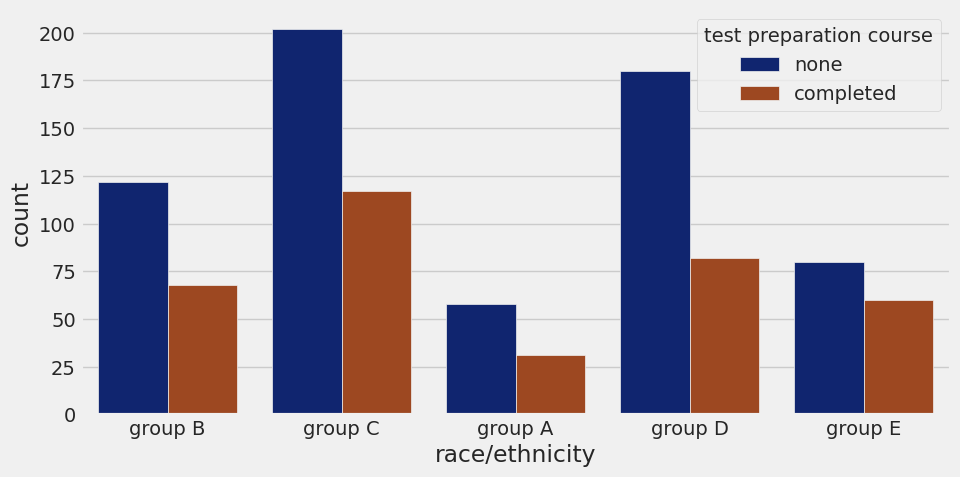

In [29]:
# race/ethnicity & test preparation

plt.subplots(figsize=(10,5))
sns.countplot(x='race/ethnicity', data = data, hue = 'test preparation course', palette = 'dark')
plt.show()

### **Part 2: Checking for Outliers & Cleaning Data and adding useful info**

<ipython-input-20-80440bf75f37>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['math score'])
<ipython-input-20-80440bf75f37>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['reading score'])
<ipython-input-20-80440bf75f37>:10: UserWarning: 

`distplot` is a deprecated function and 

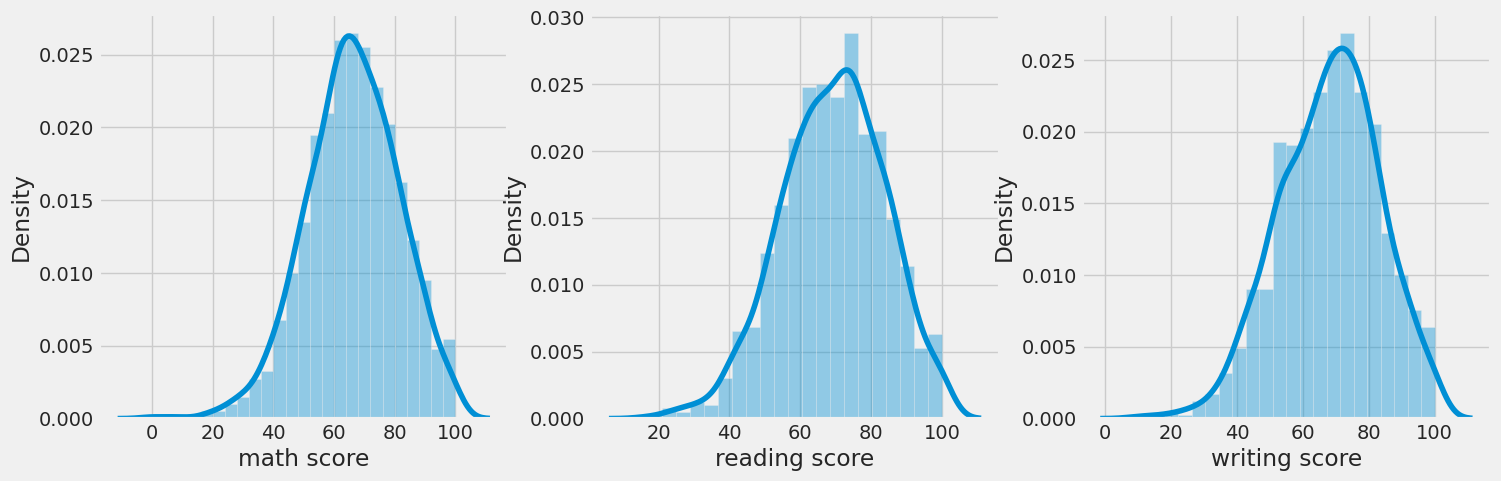

In [20]:
plt.figure(figsize = (16,5))

plt.subplot(1, 3, 1)
sns.distplot(data['math score'])

plt.subplot(1, 3, 2)
sns.distplot(data['reading score'])

plt.subplot(1, 3, 3)
sns.distplot(data['writing score'])

plt.show()

In [21]:
np.random.seed(6) #take seed so that everytime the random values are constant

# take 100 sample vaues from the 1000 values in the dataset
sample_math_marks = np.random.choice(data['math score'], 100)
sample_reading_marks = np.random.choice(data['reading score'], 100)
sample_writing_marks = np.random.choice(data['writing score'], 100)

# get sample mean
print('Sample Mean, Math Score: ', np.mean(sample_math_marks))
print('Sample Mean, Reading Score: ', np.mean(sample_reading_marks))
print('Sample Mean, Writing Score: ', np.mean(sample_writing_marks))

# get population mean
print('Population Mean, Math Score: ', data['math score'].mean())
print('Population Mean, Reading Score: ', data['reading score'].mean())
print('Population Mean, Writing Score: ', data['writing score'].mean())

Sample Mean, Math Score:  63.12
Sample Mean, Reading Score:  68.5
Sample Mean, Writing Score:  71.46
Population Mean, Math Score:  66.089
Population Mean, Reading Score:  69.169
Population Mean, Writing Score:  68.054


**Check confidence interval for the 3 scores**

i) Math score

In [22]:
import scipy.stats as stats
import math

np.random.seed(10)

# take sample size
sample_size = 1000
sample = np.random.choice(a =data['math score'],
                          size = sample_size)
sample_mean = sample.mean()

# get z-critical value
z_critical = stats.norm.ppf(q = 0.95)
print("z-critical value: ", z_critical)

# get population standard deviation
pop_stdev = data['math score'].std()

# check margin of error
# calculates how much the sample mean could vary from the true population mean
# depends on sample size, population std dev, and z-critical value
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

# defining confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)

print("Confidence internval:",end=" ")
print(confidence_interval)
print("True mean: {}".format(data['math score'].mean()))

z-critical value:  1.6448536269514722
Confidence internval: (64.82729483328328, 66.40470516671672)
True mean: 66.089


Interpretation of Results:

**Z-critical value:** 1.645 means that for a 95% confidence level, we’re using the point at which 95% of the distribution lies below.

**Confidence interval:** The 95% confidence interval for the population mean is from 64.83 to 66.40. This means if we repeatedly took samples and calculated the confidence intervals, 95% of them would contain the true population mean.

**True mean:** The actual mean of the population is 66.089, which lies within the confidence interval. This confirms that the sample-based estimate is fairly close to the true population mean.

In general, this analysis shows that based on the sample of 1000 math scores, we are 95% confident that the true population mean of the math scores lies between 64.83 and 66.40.

ii) Reading score

In [23]:
# take sample size
sample_size = 1000
sample = np.random.choice(a =data['reading score'],
                          size = sample_size)
sample_mean = sample.mean()

# get z-critical value
z_critical = stats.norm.ppf(q = 0.95)
print("z-critical value: ", z_critical)

# get population standard deviation
pop_stdev = data['reading score'].std()

# check margin of error
# calculates how much the sample mean could vary from the true population mean
# depends on sample size, population std dev, and z-critical value
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

# defining confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)

print("Confidence internval:",end=" ")
print(confidence_interval)
print("True mean: {}".format(data['reading score'].mean()))

z-critical value:  1.6448536269514722
Confidence internval: (68.80157337011646, 70.32042662988356)
True mean: 69.169


iii) Writing score

In [24]:
# take sample size
sample_size = 1000
sample = np.random.choice(a =data['writing score'],
                          size = sample_size)
sample_mean = sample.mean()

# get z-critical value
z_critical = stats.norm.ppf(q = 0.95)
print("z-critical value: ", z_critical)

# get population standard deviation
pop_stdev = data['writing score'].std()

# check margin of error
# calculates how much the sample mean could vary from the true population mean
# depends on sample size, population std dev, and z-critical value
margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

# defining confidence interval
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)

print("Confidence internval:",end=" ")
print(confidence_interval)
print("True mean: {}".format(data['writing score'].mean()))

z-critical value:  1.6448536269514722
Confidence internval: (67.74860035030862, 69.32939964969138)
True mean: 68.054


**Creating new columns for machine learning purpose later on**

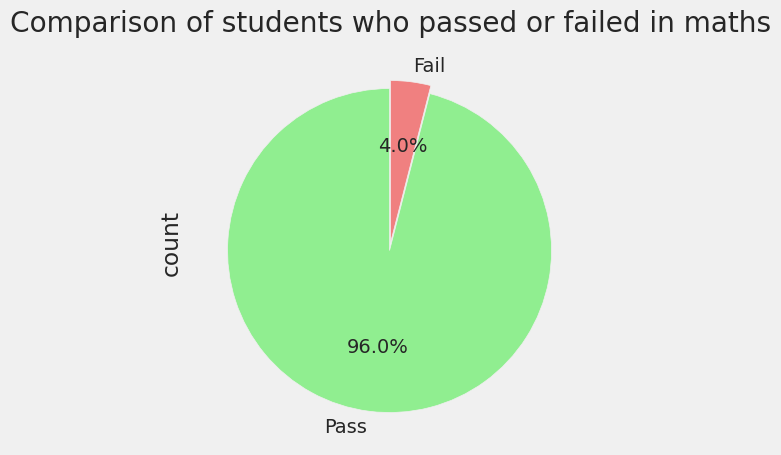

In [31]:
# setting a passing mark for students to see each subjects passing rate
plt.subplots(figsize=(10,5))
passmarks = 40

# create a new column pass_math, this column will tell us whether the student pass or fail
data['pass_math'] = np.where(data['math score'] >= passmarks, 'Pass', 'Fail')

data['pass_math'].value_counts(dropna = False).plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], startangle=90, explode=[0.05, 0])
plt.title('Comparison of students who passed or failed in maths')
plt.show()

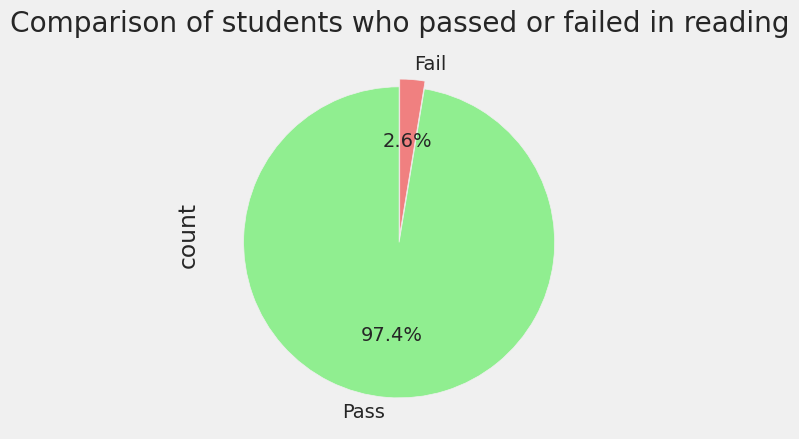

In [32]:
# create a new column pass_reading, this column will tell us whether the student pass or fail
data['pass_reading'] = np.where(data['reading score'] >= passmarks, 'Pass', 'Fail')

data['pass_reading'].value_counts(dropna = False).plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], startangle=90, explode=[0.05, 0])
plt.title('Comparison of students who passed or failed in reading')
plt.show()

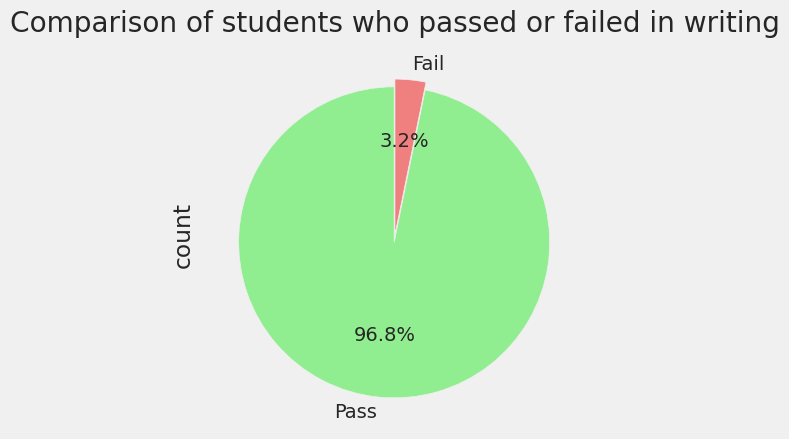

In [33]:
# create a new column pass_reading, this column will tell us whether the student pass or fail
data['pass_writing'] = np.where(data['writing score'] >= passmarks, 'Pass', 'Fail')

data['pass_writing'].value_counts(dropna = False).plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], startangle=90, explode=[0.05, 0])
plt.title('Comparison of students who passed or failed in writing')
plt.show()

In [35]:
# create new column to store students' total_score across all 3 subjects

data['total_score'] = data['math score'] + data['reading score'] + data['writing score']

In [37]:
# create a new column called 'percentage' which indicates the avg result of each student

data['percentage'] = data['total_score']/3

In [40]:
# create a new column called 'status' which help to see if students pass or fail in overall of the 3 subjects

data['status'] = np.where(data['percentage'] >= passmarks, 'Pass', 'Fail')

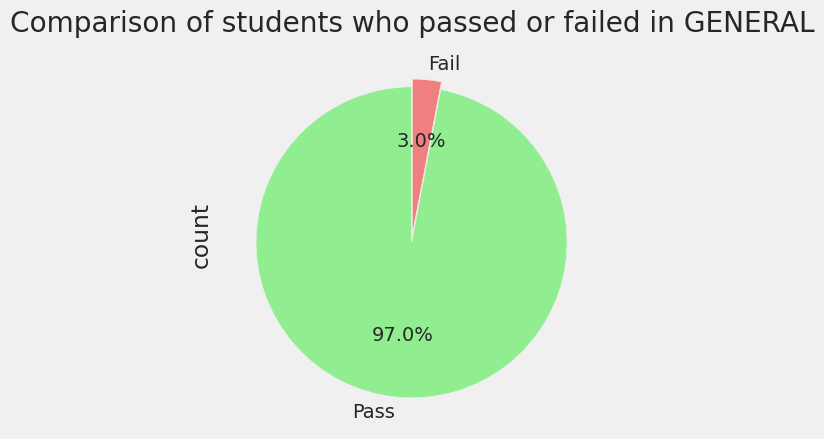

In [41]:
data['status'].value_counts(dropna = False).plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], startangle=90, explode=[0.05, 0])
plt.title('Comparison of students who passed or failed in GENERAL')
plt.show()

In [42]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,pass_math,pass_reading,pass_writing,total_score,percentage,status
0,female,group B,bachelor's degree,standard,none,72,72,74,Pass,Pass,Pass,218,72.666667,Pass
1,female,group C,some college,standard,completed,69,90,88,Pass,Pass,Pass,247,82.333333,Pass
2,female,group B,master's degree,standard,none,90,95,93,Pass,Pass,Pass,278,92.666667,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,Pass,Pass,Pass,148,49.333333,Pass
4,male,group C,some college,standard,none,76,78,75,Pass,Pass,Pass,229,76.333333,Pass


**Assigning grades to students' result**

In [44]:
def get_grade(percentage, status):
    if status == 'Fail':
        return 'E'
    if (percentage >= 40) & (percentage < 60):
        return 'D'
    if (percentage >= 60) & (percentage < 70):
        return 'C'
    if (percentage >= 70) & (percentage < 80):
        return 'B'
    if (percentage >= 80) & (percentage < 90):
        return 'A'
    else:
        return 'S'

data['grades'] = data.apply(lambda x: get_grade(x['percentage'], x['status']), axis=1)
data['grades'].value_counts()

,count
grades,
B,261
C,256
D,255
A,146
S,52
E,30


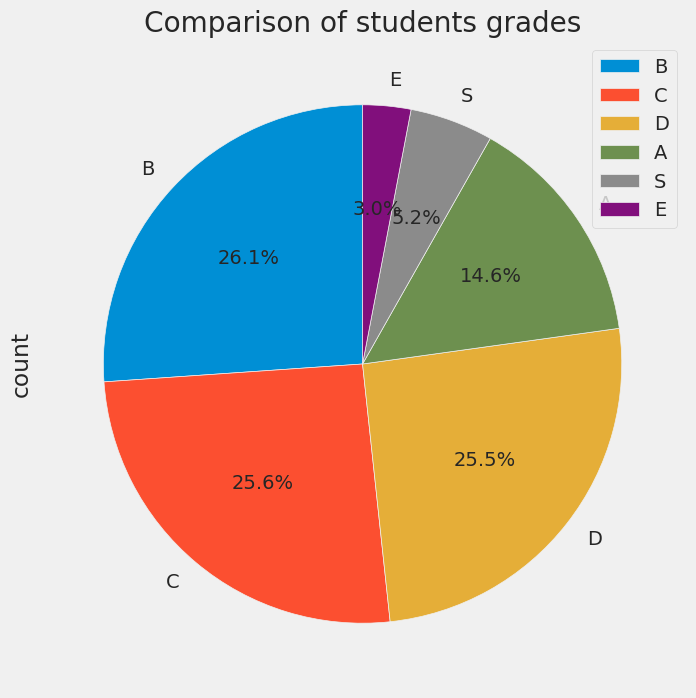

In [50]:
# plot a pie chart for the 'grades' column
plt.subplots(figsize=(15,8))
data['grades'].value_counts(dropna = False).plot.pie(autopct='%1.1f%%', startangle=90)
plt.legend(loc = 'upper right')
plt.title('Comparison of students grades')
plt.show()

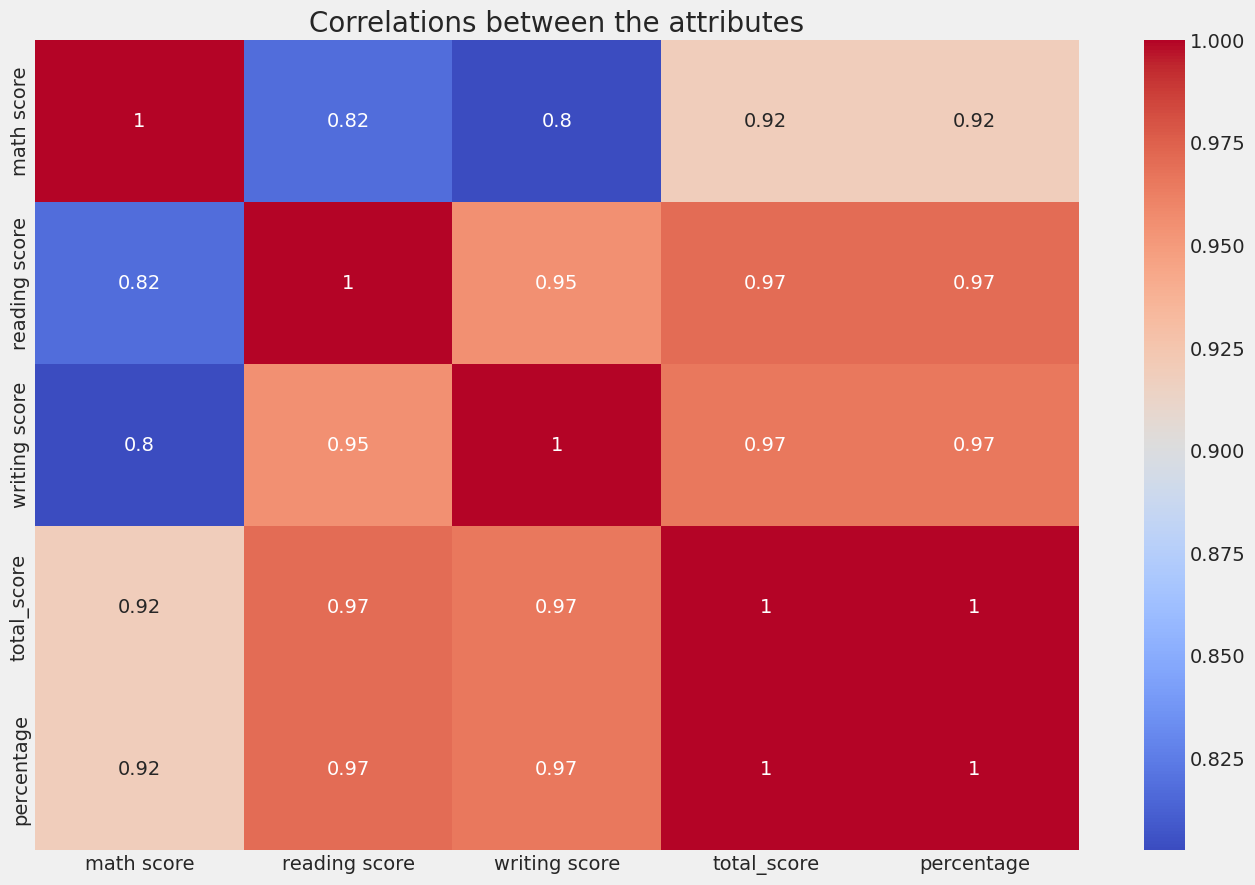

In [54]:
# heatmap
numeric_data = data.select_dtypes(include=['float64', 'int64'])
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlations between the attributes', fontsize = 20)
plt.show()

### **Part 3: Data Preprocessing**

- need to change categorical column to numerical column because machine can only read numerical values

In [55]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# label encoding for these 2 columns only (that have 2 value choices)
data['test preparation course'] = le.fit_transform(data['test preparation course'])

data['lunch'] = le.fit_transform(data['lunch'])

In [56]:
# label encoding for other categorical columns (race/ethnicity) that have more than 2 value choices

data['race/ethnicity'] = data['race/ethnicity'].map({'group A': 1, 'group B': 2, 'group C': 3, 'group D': 4, 'group E': 5})
data['race/ethnicity'].value_counts()

,count
race/ethnicity,
3,319
4,262
2,190
5,140
1,89


In [57]:
# label encoding for other categorical columns (parental level of education) that have more than 2 value choices

data['parental level of education'] = le.fit_transform(data['parental level of education'])
data['parental level of education'].value_counts()

,count
parental level of education,
4,226
0,222
2,196
5,179
1,118
3,59


In [58]:
# label encoding for gender, and other new columns

data['gender'] = le.fit_transform(data['gender'])

data['pass_math'] = le.fit_transform(data['pass_math'])

data['pass_reading'] = le.fit_transform(data['pass_reading'])

data['pass_writing'] = le.fit_transform(data['pass_writing'])

data['status'] = le.fit_transform(data['status'])

In [59]:
# label encoding for grades

data['grades'] = data['grades'].map({'E': 0, 'D': 1, 'C': 2, 'B': 3, 'A': 4, 'S': 5})
data['grades'].value_counts()

,count
grades,
3,261
2,256
1,255
4,146
5,52
0,30


### **Part 4: Model Development**


In [60]:
# splitting independent and dependent variables

# x is all input features (independent variables), in this case the first 13 columns
# y is the target feature (dependent variable), in this case the 14th column, which is grades
x = data.iloc[:, :14]
y = data.iloc[:, 14]

In [61]:
# splitting dataset into training and testing set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 14)
(200, 14)
(800,)
(200,)


In [62]:
# import MinMaxScaler - to normalize/scale the data before feeding it into models
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

# feeding the independent variables into the scaler
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

**x_train = mm.fit_transform(x_train):**

The fit_transform method does two things:

1) Fit: It calculates the minimum and maximum values for each feature in x_train.

2) Transform: It applies the scaling (using the formula above) to the training data, so that each feature is scaled between 0 and 1 (or another specified range).
x_train is now scaled.

**x_test = mm.transform(x_test):**

The transform method is applied to x_test using the same scaling parameters (min and max) calculated from x_train. This ensures that the test data is scaled using the same range as the training data.
x_test is now scaled in the same way as x_train.

In [64]:
# creading a model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(x_train, y_train)

# predicitng using x_test (which consists of the input features, also known as the first 13 columns)
y_pred = model.predict(x_test)

# calculate accuracies:
print("Training Accuracy:", model.score(x_train, y_train))
print("Testing Accuracy:", model.score(x_test, y_test))

Training Accuracy: 1.0
Testing Accuracy: 0.99


Text(0.5, 26.583333333333286, 'Predicted')

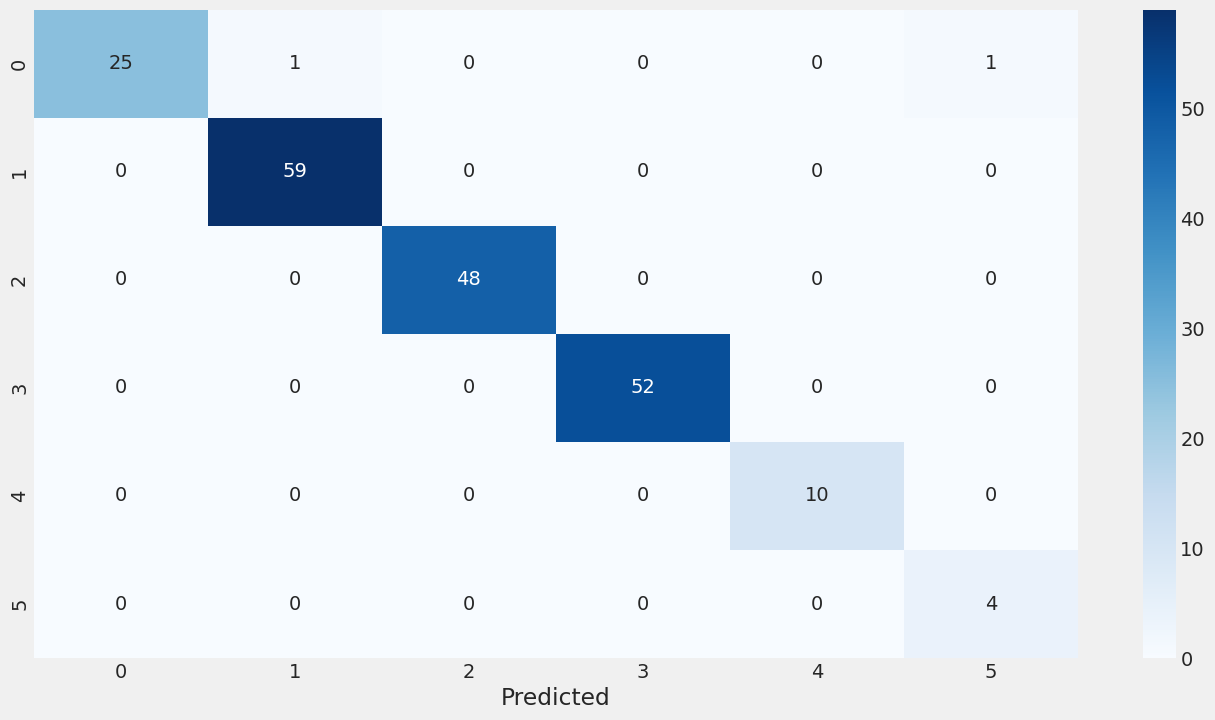

In [65]:
# confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.subplots(figsize = (15,8))
plt.rcParams['figure.figsize'] = (5,5)
sns.heatmap(cm, annot= True, cmap = 'Blues', fmt = 'g')
plt.xlabel('Predicted')

In [66]:
# classification report

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           A       1.00      0.93      0.96        27
           B       0.98      1.00      0.99        59
           C       1.00      1.00      1.00        48
           D       1.00      1.00      1.00        52
           E       1.00      1.00      1.00        10
           S       0.80      1.00      0.89         4

    accuracy                           0.99       200
   macro avg       0.96      0.99      0.97       200
weighted avg       0.99      0.99      0.99       200

